# Pylops - Seismic Inversion with cupy

In [1]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-11-11 20:29:44--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-11-11 20:29:44--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 69.4M 1s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    sqlite-3.33.0              |       h62c20be_0         2.0 MB
    ca-certificates-2020.10.14 |                0         128 KB
    libedit-3.1.20191231       |       h14c3975_1         121 KB
    setuptools-50.3.1          |   py36h06a4308_1         900 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    libffi-3.3                 |       he6710b0_2          54 KB
    yaml-0.2.5                 |       h7b6447c_0          87 KB
    cryptography-3.1.1         |   py36h1ba5d50_0         612 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    wheel-0.35.1               |             py_0          36 KB
    chardet-3.0.4              |        py36_1003   

sqlite-3.33.0        |  2.0 MB | ########## | 100% 
ca-certificates-2020 |  128 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
setuptools-50.3.1    |  900 KB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
libffi-3.3           |   54 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
cryptography-3.1.1   |  612 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
wheel-0.35.1         |   36 KB | ########## | 100% 
chardet-3.0.4        |  197 KB | ########## | 100% 
pycosat-0.6.3        |  107 KB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
pip-20.2.4           |  2.1 MB | ########## | 100% 
ncurses-6.2          |  1.1 MB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
openssl-1.1.1h       |  3.8 MB | ########## | 100% 
tqdm-4.50.2 

In [4]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

Python 3.6.12 :: Anaconda, Inc.


In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h79e6602_1         312 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-8.1.0                 |   py36h1175eb7_0        34.1 MB  conda-forge
    cusignal-0

In [7]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 6.7 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-3thnwgbc
  Created wheel for pylops: filename=pylops-1.10.1.dev128+gc26c46d-py3-none-any.whl size=166236 sha256=54a1a3b604cc9f14daf0746d910057ec7bec0054ac5a67fae0b22832719ef08c
  Stored in directory: /tmp/pip-ephem-wheel-cache-u1v1rgnd/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [8]:
# all RAPIDS env... : https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468
# https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=CtNdk7PSafKP

In [9]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import cupy as cp
import scipy as sp
import cusignal
import matplotlib.pyplot as plt

from scipy.signal import convolve

from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.basicoperators             import *
from pylops.signalprocessing           import *
from pylops.waveeqprocessing.mdd       import *
from pylops.avo.avo                    import *
from pylops.avo.poststack              import *
from pylops.avo.prestack               import *
from pylops.optimization.leastsquares  import *

dtype = np.float32

## 1D Prestack modelling and inversion

<class 'cupy.core.core.ndarray'> <class 'cupy.core.core.ndarray'> float64 float64


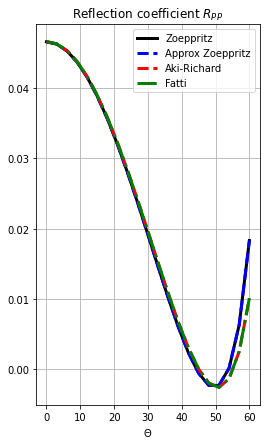

In [11]:
vp1, vs1, rho1 = 2200., 1300., 2000  # upper medium
vp0, vs0, rho0 = 2300., 1400., 2100  # lower medium

ntheta = 21
thetamin, thetamax = 0, 60
theta = cp.linspace(thetamin, thetamax, ntheta)

# Create composite parameters
ai0, si0, vpvs0 = vp0*rho0, vs0*rho0, vp0/vs0
ai1, si1, vpvs1 = vp1*rho1, vs1*rho1, vp1/vs1

# Zoeppritz
rpp_zoep = zoeppritz_pp(vp1, vs1, rho1, vp0, vs0, rho0, theta)
rpp_zoep_approx = approx_zoeppritz_pp(vp1, vs1, rho1, vp0, vs0, rho0, theta)
print(type(rpp_zoep), type(rpp_zoep_approx), rpp_zoep.dtype, rpp_zoep_approx.dtype)

# Aki Richards
rvp = np.log(vp0) - np.log(vp1)
rvs = np.log(vs0) - np.log(vs1)
rrho = np.log(rho0) - np.log(rho1)

G1, G2, G3 = akirichards(theta, vs1/vp1)
rpp_aki = G1*rvp + G2*rvs + G3*rrho

# Fatti
rai = np.log(ai0) - np.log(ai1)
rsi = np.log(si0) - np.log(si1)

G1, G2, G3 = fatti(theta, vs1/vp1)
rpp_fatti = G1*rai + G2*rsi + G3*rrho

plt.figure(figsize=(4,7))
plt.plot(cp.asnumpy(theta), cp.asnumpy(rpp_zoep), 'k', lw=3, label='Zoeppritz')
plt.plot(cp.asnumpy(theta), cp.asnumpy(rpp_zoep_approx), '--b', lw=3, label='Approx Zoeppritz')
plt.plot(cp.asnumpy(theta), cp.asnumpy(rpp_aki), '--r', lw=3, label='Aki-Richard')
plt.plot(cp.asnumpy(theta), cp.asnumpy(rpp_fatti), '-.g', lw=3, label='Fatti')
plt.xlabel(r'$\Theta$')
plt.title(r'Reflection coefficient $R_{PP}$')
plt.grid()
plt.legend();

float32 float32 float32


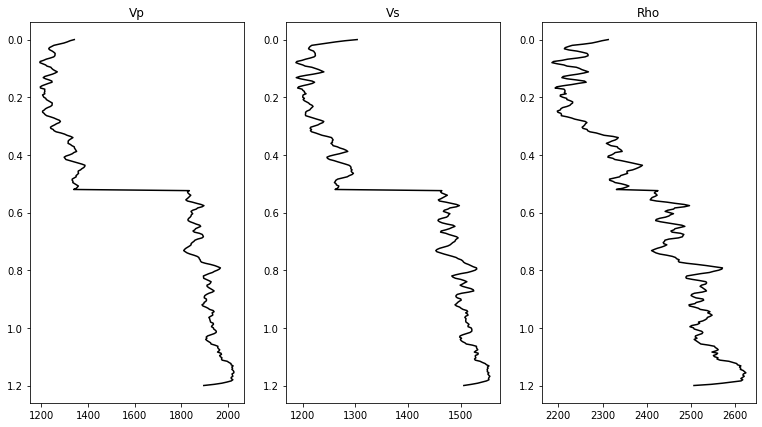

In [12]:
np.random.seed(0)

nt0 = 301
dt0 = 0.004

t0  = np.arange(nt0)*dt0
vp  = 1200 + np.arange(nt0) + filtfilt(np.ones(5)/5.,1,np.random.normal(0, 80, nt0))
vs  = 600  + vp/2           + filtfilt(np.ones(5)/5.,1,np.random.normal(0, 20, nt0))
rho = 1000 + vp             + filtfilt(np.ones(5)/5.,1,np.random.normal(0, 30, nt0))
vp[131:]+=500
vs[131:]+=200
rho[131:]+=100

fig, axs = plt.subplots (1, 3, figsize=(13,7))
axs[0].plot(vp,  t0, 'k')
axs[0].set_title('Vp')
axs[0].invert_yaxis()
axs[1].plot(vs,  t0, 'k')
axs[1].set_title('Vs')
axs[1].invert_yaxis()
axs[2].plot(rho, t0, 'k')
axs[2].set_title('Rho')
axs[2].invert_yaxis()

vp, vs, rho = cp.asarray(vp).astype(dtype), cp.asarray(vs).astype(dtype), cp.asarray(rho).astype(dtype)
print(vp.dtype, vs.dtype, rho.dtype)

In [13]:
ntheta = 21
thetamin, thetamax = 0, 40
theta = np.linspace(thetamin, thetamax, ntheta)

ntwav = 41
wav = ricker(t0[:ntwav//2+1], 15)[0]

vsvp   = 0.5
vsvp_z = np.linspace(0.4, 0.6, nt0)

m = np.stack((np.log(vp), np.log(vs), np.log(rho)),axis=1)
m = cp.asarray(m).astype(dtype)

In [14]:
# lop (constant vsvp)
PPop = PrestackLinearModelling(cp.asarray(wav).astype(dtype), cp.asarray(theta).astype(dtype), vsvp=vsvp, 
                               nt0=nt0, linearization='akirich')
dottest(PPop, nt0*ntheta, nt0*3, verb=True, tol=1e-3, backend='cupy')

# dense (constant vsvp)
PPop_dense = PrestackLinearModelling(cp.asarray(wav).astype(dtype), cp.asarray(theta).astype(dtype), vsvp=vsvp, 
                                     nt0=nt0, linearization='akirich', explicit=True)
dottest(PPop_dense, nt0*ntheta, nt0*3, verb=True, tol=1e-3, backend='cupy')
print(PPop, PPop_dense)

# lop (depth-variant vsvp)
PPop = PrestackLinearModelling(cp.asarray(wav).astype(dtype), cp.asarray(theta).astype(dtype), 
                               vsvp=cp.asarray(vsvp_z).astype(dtype), linearization='akirich')
dottest(PPop, nt0*ntheta, nt0*3, verb=True, tol=1e-3, backend='cupy')

# dense (depth-variant vsvp)
PPop_dense = PrestackLinearModelling(cp.asarray(wav).astype(dtype), cp.asarray(theta).astype(dtype), 
                               vsvp=cp.asarray(vsvp_z).astype(dtype), linearization='akirich', explicit=True)
dottest(PPop_dense, nt0*ntheta, nt0*3, verb=True, tol=1e-3, backend='cupy')
print(PPop, PPop_dense)

Dot test passed, v^T(Opu)=-39.389928 - u^T(Op^Tv)=-39.389949
Dot test passed, v^T(Opu)=54.409683 - u^T(Op^Tv)=54.409683
<6321x903 LinearOperator with dtype=float32> <6321x903 MatrixMult with dtype=float32>
Dot test passed, v^T(Opu)=56.679196 - u^T(Op^Tv)=56.679250
Dot test passed, v^T(Opu)=26.130959 - u^T(Op^Tv)=26.130959
<6321x903 LinearOperator with dtype=float32> <6321x903 MatrixMult with dtype=float32>


In [15]:
# lop
dPP = PPop * m.flatten()
dPP = dPP.reshape(nt0,ntheta)

# dense
dPP_dense = PPop_dense * m.T.flatten()
dPP_dense = dPP_dense.reshape(ntheta,nt0).T
dPPn_dense = dPP_dense + cp.random.normal(0, 1e-2, dPP_dense.shape).astype(dtype)

print(dPP.dtype, dPP_dense.dtype)

float32 float32


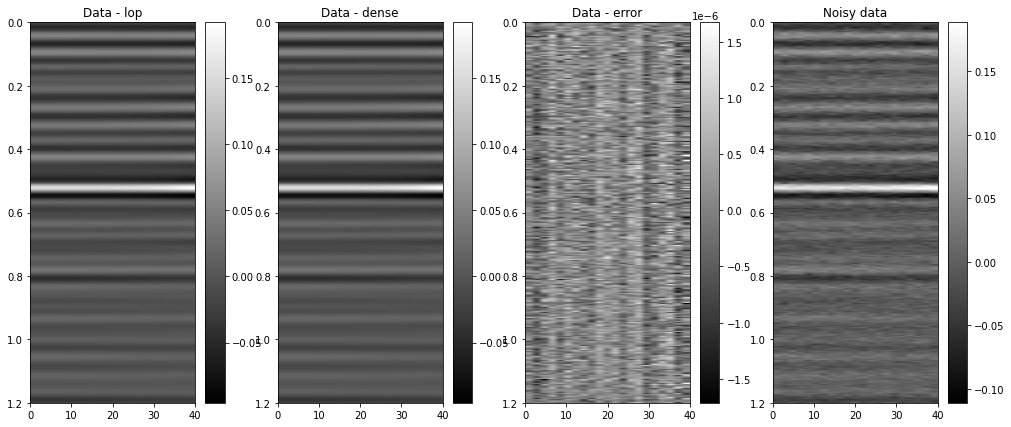

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(17,7))
im = axs[0].imshow(cp.asnumpy(dPP), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]))
axs[0].set_title('Data - lop');
axs[0].axis('tight');
fig.colorbar(im, ax=axs[0])
im = axs[1].imshow(cp.asnumpy(dPP_dense), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]))
axs[1].set_title('Data - dense');
axs[1].axis('tight');
fig.colorbar(im, ax=axs[1])
im = axs[2].imshow(cp.asnumpy(dPP - dPP_dense), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]))
axs[2].set_title('Data - error');
axs[2].axis('tight');
fig.colorbar(im, ax=axs[2]);
im = axs[3].imshow(cp.asnumpy(dPPn_dense), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]))
axs[3].set_title('Noisy data');
axs[3].axis('tight');
fig.colorbar(im, ax=axs[3]);

In [17]:
nsmooth = 50
mback = filtfilt(np.ones(nsmooth)/float(nsmooth), 1, cp.asnumpy(m), axis=0)
mback = cp.asarray(mback).astype(np.float32)

# lop
dPP_0 = PPop * mback.ravel()
dPP_r = dPP.ravel() - dPP_0

minv = NormalEquationsInversion(PPop, [], dPP_r, epsI=0, **dict(niter=100))
minv = minv.reshape(nt0,3)

# dense
dPP_0_dense = PPop_dense*mback.T.ravel()
dPP_r_dense = dPP_dense.T.ravel() - dPP_0_dense 

minv_dense = cp.linalg.lstsq(PPop_dense.A, dPP_r_dense, rcond=1e-5)[0]
minv_dense = minv_dense.reshape(3, nt0).T

minv = mback+minv
minv_dense = mback+minv_dense

print(m.dtype, mback.dtype, minv.dtype, minv_dense.dtype)

float32 float32 float32 float32


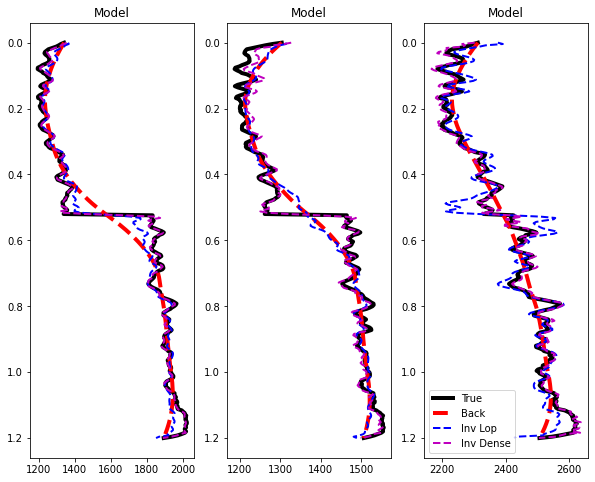

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].plot(cp.asnumpy(vp), t0, 'k', lw=4, label='True')
axs[0].plot(np.exp(cp.asnumpy(mback)[:, 0]), t0, '--r', lw=4, label='Back')
axs[0].plot(np.exp(cp.asnumpy(minv)[:, 0]), t0, '--b', lw=2, label='Inv Lop')
axs[0].plot(np.exp(cp.asnumpy(minv_dense)[:, 0]), t0, '--m', lw=2, label='Inv Dense')
axs[0].set_title('Model')
axs[0].invert_yaxis()
axs[1].plot(cp.asnumpy(vs), t0, 'k', lw=4, label='True')
axs[1].plot(np.exp(cp.asnumpy(mback)[:, 1]), t0, '--r', lw=4, label='Back')
axs[1].plot(np.exp(cp.asnumpy(minv)[:, 1]), t0, '--b', lw=2, label='Inv Lop')
axs[1].plot(np.exp(cp.asnumpy(minv_dense)[:, 1]), t0, '--m', lw=2, label='Inv Dense')
#axs[1].plot(np.exp(minv_noise[:, 1]), t0, '--g', lw=2, label='Inv Noisy')
axs[1].set_title('Model')
axs[1].invert_yaxis()
axs[1].axis('tight')
axs[2].plot(cp.asnumpy(rho), t0, 'k', lw=4, label='True')
axs[2].plot(np.exp(cp.asnumpy(mback)[:, 2]), t0, '--r', lw=4, label='Back')
axs[2].plot(np.exp(cp.asnumpy(minv)[:, 2]), t0, '--b', lw=2, label='Inv Lop')
axs[2].plot(np.exp(cp.asnumpy(minv_dense)[:, 2]), t0, '--m', lw=2, label='Inv Dense')
#axs[2].plot(np.exp(minv_noise[:, 2]), t0, '--g', lw=2, label='Inv Noisy')
axs[2].set_title('Model')
axs[2].invert_yaxis()
axs[2].axis('tight')
axs[2].legend();

float32 float32 float32 float32


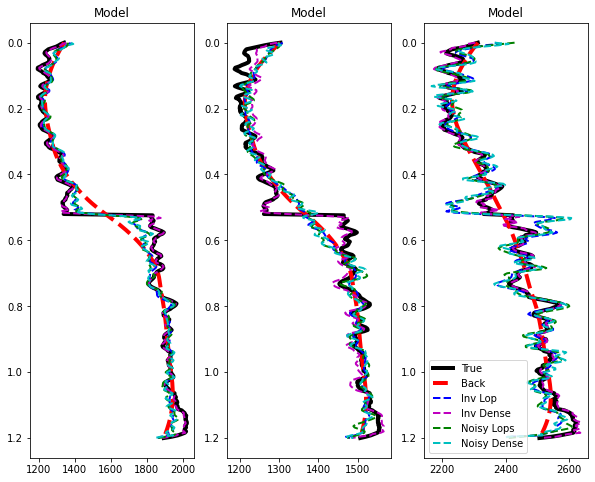

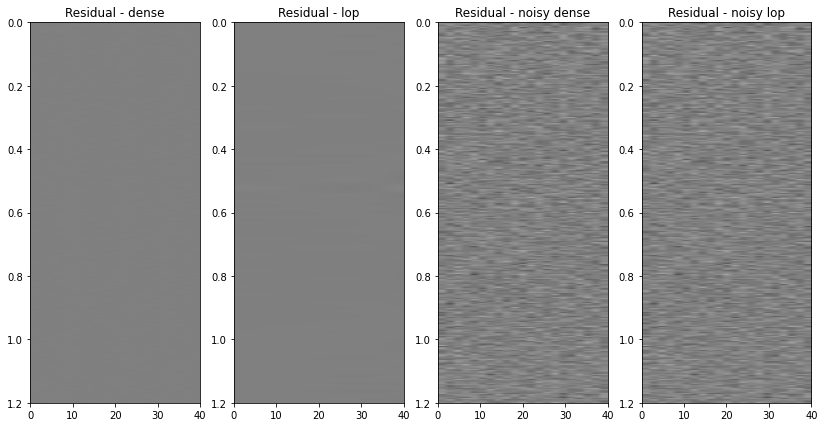

In [19]:
minv_dense, dPP_dense_res = \
    PrestackInversion(dPP_dense, cp.asarray(theta).astype(dtype), cp.asarray(wav).astype(dtype), m0=mback, linearization='akirich',
                      explicit=True, returnres=True, **dict(rcond=1e-5))

minv, dPP_res = \
    PrestackInversion(dPP, cp.asarray(theta).astype(dtype), cp.asarray(wav).astype(dtype), m0=mback, linearization='akirich',
                      explicit=False, returnres=True, **dict(damp=1e-10, niter=2000))

minv_dense_noise, dPPn_dense_res = \
    PrestackInversion(dPPn_dense, cp.asarray(theta).astype(dtype), cp.asarray(wav).astype(dtype), m0=mback, 
                      linearization='akirich', explicit=True, 
                      simultaneous=False, returnres=True, **dict(rcond=2e-2))

minv_noise, dPPn_res = \
    PrestackInversion(dPPn_dense, cp.asarray(theta).astype(dtype), cp.asarray(wav).astype(dtype), m0=mback, 
                      linearization='akirich', explicit=False, 
                      epsR=5e-1, returnres=True, **dict(damp=1e-1, niter=2000))

print(minv_dense.dtype, minv.dtype, minv_dense_noise.dtype, minv_noise.dtype)

fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].plot(cp.asnumpy(vp), t0, 'k', lw=4, label='True')
axs[0].plot(np.exp(cp.asnumpy(mback)[:, 0]), t0, '--r', lw=4, label='Back')
axs[0].plot(np.exp(cp.asnumpy(minv)[:, 0]), t0, '--b', lw=2, label='Inv Lop')
axs[0].plot(np.exp(cp.asnumpy(minv_dense)[:, 0]), t0, '--m', lw=2, label='Inv Dense')
axs[0].plot(np.exp(cp.asnumpy(minv_noise)[:, 0]), t0, '--g', lw=2, label='Noisy Lops')
axs[0].plot(np.exp(cp.asnumpy(minv_dense_noise)[:, 0]), t0, '--c', lw=2, label='Noisy Dense')
axs[0].set_title('Model')
axs[0].invert_yaxis()
axs[0].axis('tight')
axs[1].plot(cp.asnumpy(vs), t0, 'k', lw=4, label='True')
axs[1].plot(np.exp(cp.asnumpy(mback)[:, 1]), t0, '--r', lw=4, label='Back')
axs[1].plot(np.exp(cp.asnumpy(minv)[:, 1]), t0, '--b', lw=2, label='Inv Lop')
axs[1].plot(np.exp(cp.asnumpy(minv_dense)[:, 1]), t0, '--m', lw=2, label='Inv Dense')
axs[1].plot(np.exp(cp.asnumpy(minv_noise)[:, 1]), t0, '--g', lw=2, label='Noisy Lops')
axs[1].plot(np.exp(cp.asnumpy(minv_dense_noise)[:, 1]), t0, '--c', lw=2, label='Noisy Dense')
axs[1].set_title('Model')
axs[1].invert_yaxis()
axs[1].axis('tight')
axs[2].plot(cp.asnumpy(rho), t0, 'k', lw=4, label='True')
axs[2].plot(np.exp(cp.asnumpy(mback)[:, 2]), t0, '--r', lw=4, label='Back')
axs[2].plot(np.exp(cp.asnumpy(minv)[:, 2]), t0, '--b', lw=2, label='Inv Lop')
axs[2].plot(np.exp(cp.asnumpy(minv_dense)[:, 2]), t0, '--m', lw=2, label='Inv Dense')
axs[2].plot(np.exp(cp.asnumpy(minv_noise)[:, 2]), t0, '--g', lw=2, label='Noisy Lops')
axs[2].plot(np.exp(cp.asnumpy(minv_dense_noise)[:, 2]), t0, '--c', lw=2, label='Noisy Dense')
axs[2].set_title('Model')
axs[2].invert_yaxis()
axs[2].axis('tight')
axs[2].legend();

fig, axs = plt.subplots(1, 4, figsize=(14,7))
im = axs[0].imshow(cp.asnumpy(dPP_dense_res), cmap='gray', 
                   extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[0].set_title('Residual - dense');
axs[0].axis('tight');
im = axs[1].imshow(cp.asnumpy(dPP_res), cmap='gray', 
                   extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[1].set_title('Residual - lop');
axs[1].axis('tight');
im = axs[2].imshow(cp.asnumpy(dPPn_dense_res), cmap='gray', 
                   extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[2].set_title('Residual - noisy dense');
axs[2].axis('tight');
im = axs[3].imshow(cp.asnumpy(dPPn_res), cmap='gray', 
                   extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[3].set_title('Residual - noisy lop');
axs[3].axis('tight');

## Wavelet estimation

<6321x41 VStack with dtype=float32> <6321x41 VStack with dtype=float32>
Dot test passed, v^T(Opu)=5.538016 - u^T(Op^Tv)=5.538016
Dot test passed, v^T(Opu)=9.072615 - u^T(Op^Tv)=9.072615
float32 float32


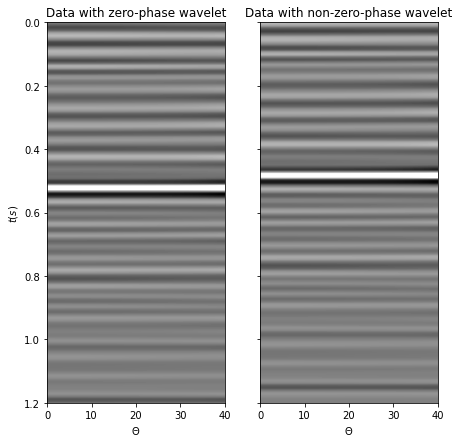

In [20]:
# Create wavelets
ntwav = 41
wavoff=10
wav, twav, wavc = ricker(t0[:ntwav//2+1],20)
wav_phase = np.hstack((wav[wavoff:], np.zeros(wavoff)))

# Create operators
Wavesop = PrestackWaveletModelling(m.astype(np.float32), cp.asarray(theta).astype(np.float32), nwav=ntwav, wavc=wavc,
                                   vsvp=vsvp, linearization='akirich')
Wavesop_phase = PrestackWaveletModelling(m.astype(np.float32), cp.asarray(theta).astype(np.float32), nwav=ntwav, wavc=wavc,
                                         vsvp=vsvp, linearization='akirich')
print(Wavesop, Wavesop_phase)
dottest(Wavesop, nt0*ntheta, ntwav, verb=True, backend='cupy')
dottest(Wavesop_phase, nt0*ntheta, ntwav, verb=True, backend='cupy')

# Create data
d = (Wavesop*cp.asarray(wav)).reshape(ntheta,nt0).T
d_phase = (Wavesop_phase*cp.asarray(wav_phase)).reshape(ntheta,nt0).T
print(d.dtype, d_phase.dtype)

fig, axs = plt.subplots(1,2, figsize=(7,7), sharey=True)
axs[0].imshow(cp.asnumpy(d), cmap='gray', extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[0].axis('tight')
axs[0].set_xlabel(r'$\Theta$'), axs[0].set_ylabel(r'$t(s)$')
axs[0].set_title('Data with zero-phase wavelet')
axs[1].imshow(cp.asnumpy(d_phase), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[1].axis('tight')
axs[1].set_title('Data with non-zero-phase wavelet')
axs[1].set_xlabel(r'$\Theta$');

float32 float32


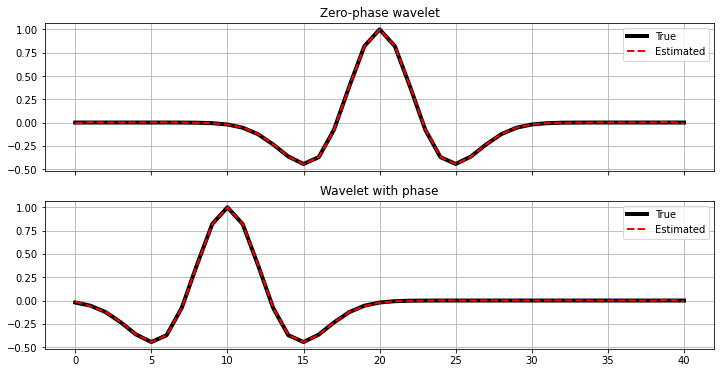

In [21]:
wav_est = Wavesop / d.T.flatten()
wav_phase_est = Wavesop_phase / d_phase.T.flatten()
print(wav_est.dtype, wav_phase_est.dtype)

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,6))
axs[0].plot(wav, 'k', lw=4, label='True')
axs[0].plot(cp.asnumpy(wav_est), '--r', lw=2, label='Estimated')
axs[0].set_title('Zero-phase wavelet')
axs[0].grid()
axs[0].legend(loc='best')
axs[0].axis('tight')
axs[1].plot(wav_phase, 'k', lw=4, label='True')
axs[1].plot(cp.asnumpy(wav_phase_est), '--r', lw=2, label='Estimated')
axs[1].set_title('Wavelet with phase')
axs[1].grid()
axs[1].legend(loc='best')
axs[1].axis('tight');

float32 float32


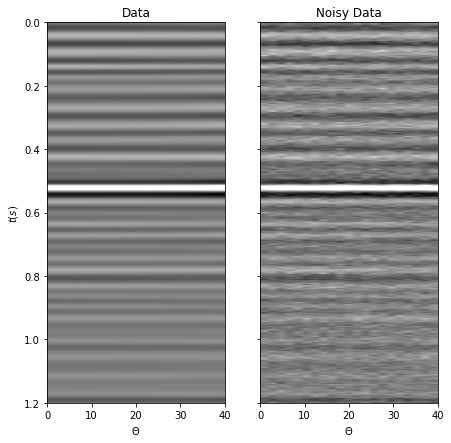

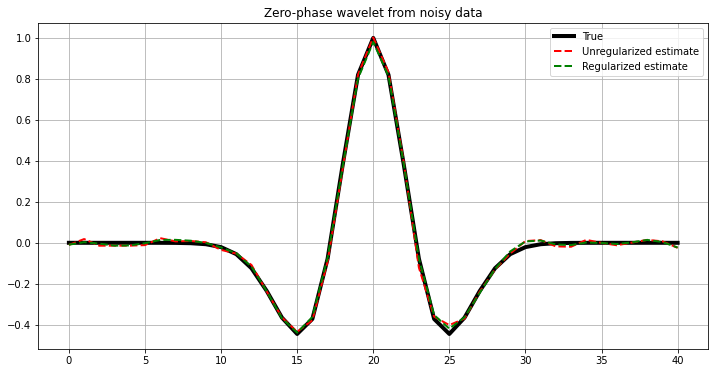

In [22]:
#add noise 
dn = d + cp.random.normal(0, 1e-2, d.shape).astype(dtype)

# unregularized estimate
wavn_est = Wavesop / dn.T.flatten()

# regularized estimate
# Create regularization operator
D2op  = SecondDerivative(ntwav, dtype=dtype)

# Invert for interpolated signal
wavn_reg_est, istop, itn, r1norm, r2norm = \
    RegularizedInversion(Wavesop, [D2op], dn.T.flatten(), epsRs=[np.sqrt(0.1)], returninfo=True,
                         **dict(damp=np.sqrt(1e-4), niter=200 ,show=0))
print(wavn_est.dtype, wavn_reg_est.dtype)

fig, axs = plt.subplots(1,2, figsize=(7,7), sharey=True)
axs[0].imshow(cp.asnumpy(d), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[0].axis('tight')
axs[0].set_xlabel(r'$\Theta$'), axs[0].set_ylabel(r'$t(s)$')
axs[0].set_title('Data')
axs[1].imshow(cp.asnumpy(dn), cmap='gray', 
              extent=(theta[0], theta[-1], t0[-1], t0[0]), vmin=-0.1, vmax=0.1)
axs[1].axis('tight')
axs[1].set_title('Noisy Data')
axs[1].set_xlabel(r'$\Theta$');

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,6))
ax.plot(wav, 'k', lw=4, label='True')
ax.plot(cp.asnumpy(wavn_est), '--r', lw=2, label='Unregularized estimate')
ax.plot(cp.asnumpy(wavn_reg_est), '--g', lw=2, label='Regularized estimate')
ax.set_title('Zero-phase wavelet from noisy data')
ax.grid()
ax.legend(loc='best')
ax.axis('tight');

float32 float32


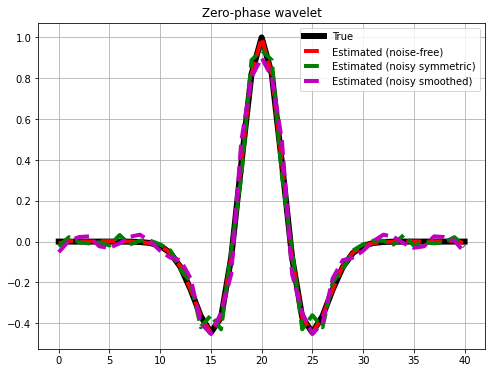

In [23]:
# Create symmetrize operator
Sop = Symmetrize((ntwav+1)//2, dtype=dtype)

# Create smoothing operator
Smop = Smoothing1D(5, dims=((ntwav+1)//2,), dtype=dtype)

# Invert for interpolated signal
wavn_prec_est = \
    PreconditionedInversion(Wavesop, Sop,
                            dn.T.flatten(),
                            returninfo=False,
                            **dict(damp=np.sqrt(1e-4),
                                   niter=200, show=0))

wavn_smooth_est = \
    PreconditionedInversion(Wavesop, Sop*Smop,
                            dn.T.flatten(),
                            returninfo=False,
                            **dict(damp=np.sqrt(1e-4),
                                   niter=200, show=0))

print(wavn_prec_est.dtype, wavn_smooth_est.dtype)


fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 6))
ax.plot(wav, 'k', lw=6, label='True')
ax.plot(cp.asnumpy(wav_est), '--r', lw=4, label='Estimated (noise-free)')
ax.plot(cp.asnumpy(wavn_prec_est), '--g', lw=4, label='Estimated (noisy symmetric)')
ax.plot(cp.asnumpy(wavn_smooth_est), '--m', lw=4, label='Estimated (noisy smoothed)')
ax.set_title('Zero-phase wavelet')
ax.grid()
ax.legend(loc='upper right');

## 1D Poststack inversion

In [24]:
m1d = cp.asarray(np.log(vp*rho).flatten()).astype(dtype)

# lop
PPop = PoststackLinearModelling(cp.asarray(wav).astype(dtype), nt0=nt0, explicit=False)
dottest(PPop, nt0, nt0, verb=True, backend='cupy')

# dense
PPop_dense = PoststackLinearModelling(cp.asarray(wav).astype(dtype), nt0=nt0, explicit=True)
dottest(PPop_dense, nt0, nt0, verb=True, backend='cupy')

print(PPop, PPop_dense, PPop_dense.A.dtype)

# data
d = PPop * m1d
d_dense = PPop_dense * m1d.flatten()
dn_dense = d_dense + cp.random.normal(0, 3e-2, d_dense.shape).astype(np.float32)
print(d.dtype, d_dense.dtype)

Dot test passed, v^T(Opu)=8.243344 - u^T(Op^Tv)=8.243337
Dot test passed, v^T(Opu)=6.067116 - u^T(Op^Tv)=6.067116
<301x301 LinearOperator with dtype=float32> <301x301 MatrixMult with dtype=float32> float32
float32 float32


float32 float32 float32 float32


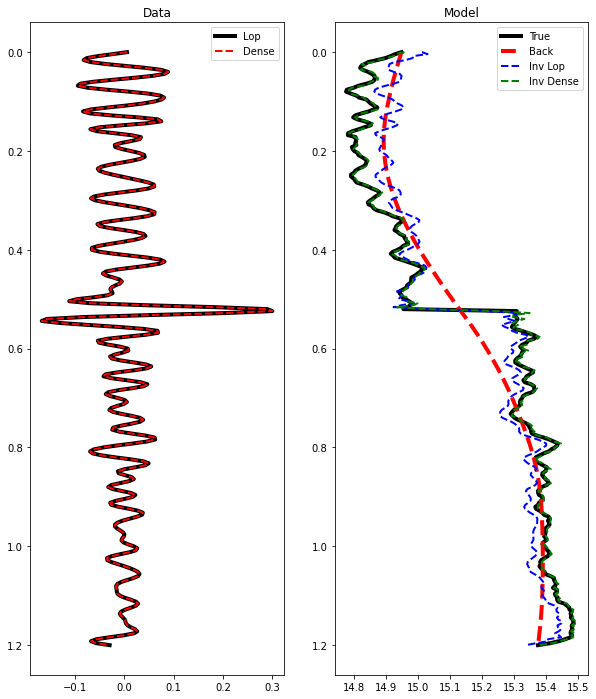

In [25]:
nsmooth = 100
m1dback = cp.asarray(filtfilt(np.ones(nsmooth).astype(dtype)/float(nsmooth), 1, cp.asnumpy(m1d))).astype(dtype)

# solve lop
d0 = PPop*m1dback
dr = d - d0
minv = cgls(PPop, dr, cp.zeros_like(m1dback).astype(dtype), niter=600, tol=0)[0]
minv = m1dback + minv

# solve dense
d0_dense = PPop*m1dback
dr_dense = d_dense - d0_dense
minv_dense = cp.linalg.lstsq(PPop_dense.A, dr_dense, rcond=1e-5)[0]
minv_dense = m1dback + minv_dense

print(dr.dtype, dr_dense.dtype, minv.dtype, minv_dense.dtype)

fig, axs = plt.subplots(1, 2, figsize=(10, 12))
axs[0].plot(cp.asnumpy(d), t0, 'k', lw=4, label='Lop')
axs[0].plot(cp.asnumpy(d_dense), t0,'--r', lw=2, label='Dense')
axs[0].set_title('Data')
axs[0].invert_yaxis()
axs[0].axis('tight')
axs[0].legend()
axs[1].plot(cp.asnumpy(m1d), t0, 'k', lw=4, label='True')
axs[1].plot(cp.asnumpy(m1dback), t0, '--r', lw=4, label='Back')
axs[1].plot(cp.asnumpy(minv), t0, '--b', lw=2, label='Inv Lop')
axs[1].plot(cp.asnumpy(minv_dense), t0, '--g', lw=2, label='Inv Dense')
axs[1].set_title('Model')
axs[1].invert_yaxis()
axs[1].axis('tight')
axs[1].legend();

Dot test passed, v^T(Opu)=-0.123642 - u^T(Op^Tv)=-0.123642
Dot test passed, v^T(Opu)=31.607868 - u^T(Op^Tv)=31.607851
Dot test passed, v^T(Opu)=-3.129624 - u^T(Op^Tv)=-3.129624
float32 float32 float32


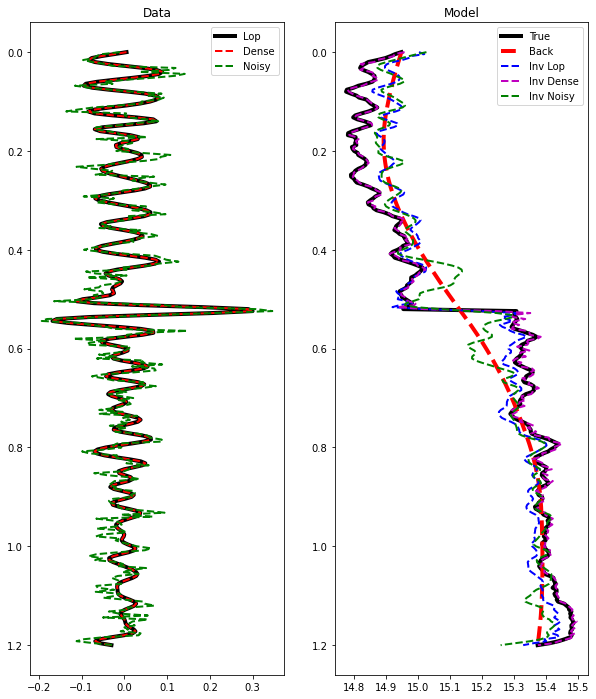

In [26]:
minv_dense = PoststackInversion(d_dense, cp.asarray(wav).astype(dtype), m0=m1dback, 
                                explicit=True, simultaneous=False, dottest=True, **dict(rcond=1e-5))[0]

minv = PoststackInversion(d_dense, cp.asarray(wav).astype(dtype), m0=m1dback.astype(dtype), 
                          explicit=False, simultaneous=False, dottest=True,
                          **dict(niter=500, tol=0))[0]

minv_noise = PoststackInversion(dn_dense, cp.asarray(wav).astype(dtype), m0=m1dback.astype(dtype), explicit=True, 
                                epsR=1e0, dottest=True, **dict(damp=1e-1))[0]

print(minv_dense.dtype, minv.dtype, minv_noise.dtype)

fig, axs = plt.subplots(1, 2, figsize=(10, 12))
axs[0].plot(cp.asnumpy(d), t0, 'k', lw=4, label='Lop')
axs[0].plot(cp.asnumpy(d_dense), t0,'--r', lw=2, label='Dense')
axs[0].plot(cp.asnumpy(dn_dense), t0,'--g', lw=2, label='Noisy')
axs[0].set_title('Data')
axs[0].invert_yaxis()
axs[0].axis('tight')
axs[0].legend()
axs[1].plot(cp.asnumpy(m1d), t0, 'k', lw=4, label='True')
axs[1].plot(cp.asnumpy(m1dback), t0, '--r', lw=4, label='Back')
axs[1].plot(cp.asnumpy(minv), t0, '--b', lw=2, label='Inv Lop')
axs[1].plot(cp.asnumpy(minv_dense), t0, '--m', lw=2, label='Inv Dense')
axs[1].plot(cp.asnumpy(minv_noise), t0, '--g', lw=2, label='Inv Noisy')
axs[1].set_title('Model')
axs[1].invert_yaxis()
axs[1].axis('tight')
axs[1].legend();

## 2D Poststack inversion

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

inputfile = '/content/gdrive/My Drive/poststack_model.npz'

Mounted at /content/gdrive


In [28]:
model = np.load(inputfile)
x, z, m = model['x'], model['z'], cp.asarray(np.log(model['model'])).astype(dtype)
nx, nz = len(x), len(z)

In [29]:
# lop
PPop = PoststackLinearModelling(cp.asarray(wav).astype(dtype), nt0=nz, spatdims=nx, explicit=False)
dottest(PPop, nz*nx, nz*nx, verb=True, tol=1e-3, backend='cupy')

# dense
PPop_dense = PoststackLinearModelling(cp.asarray(wav).astype(dtype), nt0=nz, spatdims=nx, explicit=True)
dottest(PPop_dense, nz*nx, nz*nx, verb=True, tol=1e-3, backend='cupy')

# data
d = (PPop*m.ravel()).reshape(nz,nx)
d_dense = (PPop_dense*m.flatten()).reshape(nz,nx)
print((d - d_dense).max())

n = cp.random.normal(0, 1e-1, d_dense.shape).astype(dtype)
dn = d + n
dn_dense = d_dense + n

print(d.dtype, d_dense.dtype)

Dot test passed, v^T(Opu)=202.955609 - u^T(Op^Tv)=202.956450
Dot test passed, v^T(Opu)=-647.438709 - u^T(Op^Tv)=-647.438709
5.364418e-07
float32 float32


In [30]:
nsmooth = 60
mback = filtfilt(np.ones(nsmooth)/float(nsmooth), 1, cp.asnumpy(m), axis=0)
mback = cp.asarray(filtfilt(np.ones(nsmooth)/float(nsmooth), 1, mback, axis=1)).astype(dtype)

d_0_dense = PPop_dense*mback.ravel()
d_0_lop = PPop*mback.ravel()

In [31]:
madj_dense = PPop_dense.H*d_dense.ravel()
madj = PPop.H*d.ravel()
print((madj - madj_dense).max())

1.5497208e-06


<440000x440000 LinearOperator with dtype=float32>
float32 float32 float32


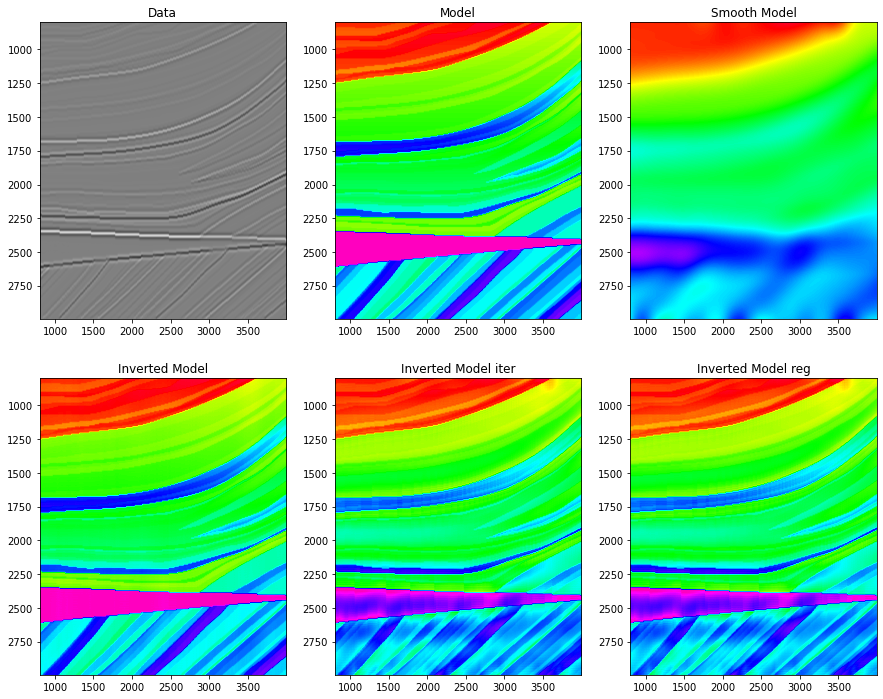

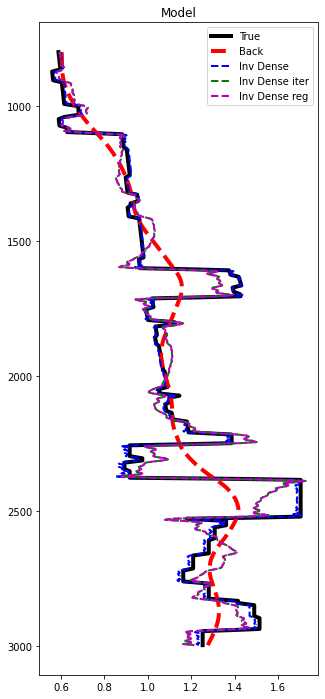

In [32]:
# solve all rows indipendently
d_r_dense = d_dense - d_0_dense.reshape(nz,nx)
minv_dense = get_lstsq(m)(PPop_dense.A, d_r_dense, rcond=1e-5)[0]
minv_dense = mback + minv_dense

# solve all rows together
d_r_dense_iter = d_dense - d_0_dense.reshape(nz,nx)
minv_dense_iter = cgls(PPop_dense, d_r_dense_iter.ravel(), cp.zeros_like(d_r_dense_iter.ravel()), niter=100)[0]
minv_dense_iter = minv_dense_iter.reshape(nz, nx)
minv_dense_iter = mback + minv_dense_iter.reshape(nz, nx)

# solve all rows together with regularization
D2op  = Laplacian([nz, nx], dtype=dtype)
print(D2op)

minv_dense_reg = NormalEquationsInversion(PPop_dense, [D2op], d_r_dense.flatten(),
                                          epsRs=[np.sqrt(1e-4)], returninfo=False,
                                          **dict(niter=100))
minv_dense_reg = mback + minv_dense_reg.reshape(nz, nx)

print(minv_dense.dtype, minv_dense_iter.dtype, minv_dense_reg.dtype)

fig, axs = plt.subplots(2, 3, figsize=(15,12))
axs[0][0].imshow(cp.asnumpy(d), cmap='gray', extent = (x[0], x[-1], z[-1], z[0]), vmin=-1, vmax=1)
axs[0][0].set_title('Data')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(m), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[0][1].set_title('Model')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(mback), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[0][2].set_title('Smooth Model')
axs[0][2].axis('tight')
axs[1][0].imshow(cp.asnumpy(minv_dense), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][0].set_title('Inverted Model')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(minv_dense_iter), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][1].set_title('Inverted Model iter')
axs[1][1].axis('tight');
axs[1][2].imshow(cp.asnumpy(minv_dense_reg), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][2].set_title('Inverted Model reg')
axs[1][2].axis('tight');

fig, ax = plt.subplots(1, 1, figsize=(5, 12))
ax.plot(cp.asnumpy(m)[:,nx//2], z, 'k', lw=4, label='True')
ax.plot(cp.asnumpy(mback)[:,nx//2], z, '--r', lw=4, label='Back')
ax.plot(cp.asnumpy(minv_dense)[:,nx//2], z, '--b', lw=2, label='Inv Dense')
ax.plot(cp.asnumpy(minv_dense_iter)[:,nx//2], z, '--g', lw=2, label='Inv Dense iter')
ax.plot(cp.asnumpy(minv_dense_reg)[:,nx//2], z, '--m', lw=2, label='Inv Dense reg')
ax.set_title('Model')
ax.invert_yaxis()
ax.axis('tight')
ax.legend();

float32 float32 float32 float32 float32


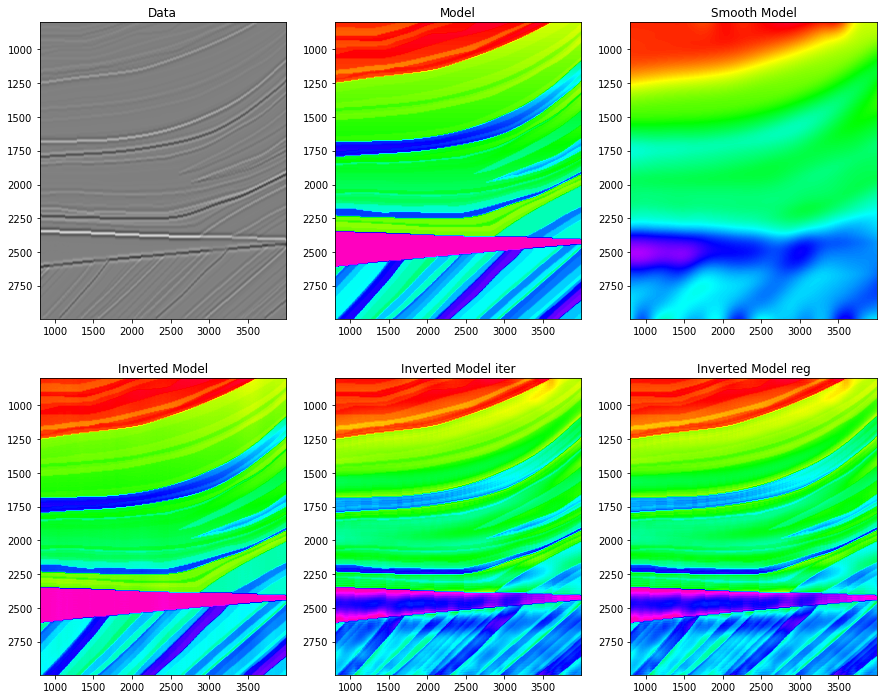

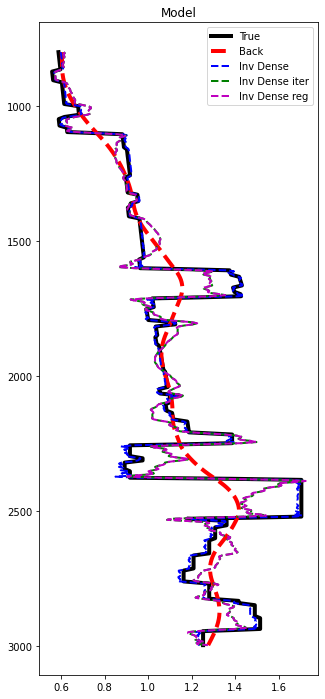

In [33]:
wav_cp = cp.asarray(wav).astype(dtype)

minv_dense, dr_dense = PoststackInversion(d_dense, wav_cp, m0=mback, explicit=True, simultaneous=False, **dict(rcond=1e-5))
minv_dense_iter, dr_dense_iter = PoststackInversion(d_dense, wav_cp, m0=mback, explicit=True, simultaneous=True, 
                                                    **dict(niter=50))
minv_dense_reg, dr_dense_reg = PoststackInversion(d_dense, wav_cp, m0=mback, explicit=True, epsR=np.sqrt(1e-4), 
                                                      **dict(damp=np.sqrt(1e-4), niter=50))
minv_lop_iter, dr_lop_iter = PoststackInversion(d, wav_cp, m0=mback, explicit=False, 
                                                    **dict(niter=50))
minv_lop_reg, dr_lop_reg = PoststackInversion(d, wav_cp, m0=mback, explicit=False, epsR=np.sqrt(1e-4),
                                              **dict(damp=np.sqrt(1e-4), niter=50))

print(minv_dense.dtype, minv_dense_iter.dtype, minv_dense_reg.dtype, minv_lop_iter.dtype, minv_lop_reg.dtype)

fig, axs = plt.subplots(2, 3, figsize=(15,12))
axs[0][0].imshow(cp.asnumpy(d), cmap='gray', extent = (x[0], x[-1], z[-1], z[0]), vmin=-1, vmax=1)
axs[0][0].set_title('Data')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(m), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[0][1].set_title('Model')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(mback), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[0][2].set_title('Smooth Model')
axs[0][2].axis('tight')
axs[1][0].imshow(cp.asnumpy(minv_dense), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][0].set_title('Inverted Model')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(minv_dense_iter), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][1].set_title('Inverted Model iter')
axs[1][1].axis('tight');
axs[1][2].imshow(cp.asnumpy(minv_dense_reg), cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
                 vmin=m.min(), vmax=m.max())
axs[1][2].set_title('Inverted Model reg')
axs[1][2].axis('tight');

fig, ax = plt.subplots(1, 1, figsize=(5, 12))
ax.plot(cp.asnumpy(m)[:,nx//2], z, 'k', lw=4, label='True')
ax.plot(cp.asnumpy(mback)[:,nx//2], z, '--r', lw=4, label='Back')
ax.plot(cp.asnumpy(minv_dense)[:,nx//2], z, '--b', lw=2, label='Inv Dense')
ax.plot(cp.asnumpy(minv_dense_iter)[:,nx//2], z, '--g', lw=2, label='Inv Dense iter')
ax.plot(cp.asnumpy(minv_dense_reg)[:,nx//2], z, '--m', lw=2, label='Inv Dense reg')
ax.set_title('Model')
ax.invert_yaxis()
ax.axis('tight')
ax.legend();

In [34]:
PPop_np = PoststackLinearModelling(wav.astype(dtype), nt0=nz, spatdims=nx, explicit=False)
PPop_dense_np = PoststackLinearModelling(wav.astype(dtype), nt0=nz, spatdims=nx, explicit=True)

In [35]:
%timeit -r 3 -n 3 NormalEquationsInversion(PPop_dense, [D2op], d_r_dense.ravel(), epsRs=[np.sqrt(1e-4)], returninfo=False, **dict(niter=100))
%timeit -r 3 -n 3 NormalEquationsInversion(PPop, [D2op], d_r_dense.ravel(), epsRs=[np.sqrt(1e-4)], returninfo=False, **dict(niter=100))

d_np = cp.asnumpy(d)
%timeit -r 3 -n 3 NormalEquationsInversion(PPop_dense_np, [D2op], d_np.ravel(), epsRs=[np.sqrt(1e-4)], returninfo=False, **dict(maxiter=100))
%timeit -r 3 -n 3 NormalEquationsInversion(PPop_np, [D2op], d_np.ravel(), epsRs=[np.sqrt(1e-4)], returninfo=False, **dict(maxiter=100))

3 loops, best of 3: 168 ms per loop
3 loops, best of 3: 540 ms per loop
3 loops, best of 3: 3.09 s per loop
3 loops, best of 3: 4.81 s per loop


In [36]:
%timeit -n4 -r2 PoststackInversion(d, wav_cp, m0=mback, explicit=False, epsR=np.sqrt(1e-4), **dict(damp=np.sqrt(1e-4), niter=50, tol=0))

4 loops, best of 2: 289 ms per loop


In [37]:
d_np, mback_np = cp.asnumpy(d), cp.asnumpy(mback)
%timeit -n4 -r2 PoststackInversion(d_np, wav, m0=mback_np, explicit=False, epsR=np.sqrt(1e-4), **dict(damp=np.sqrt(1e-4), iter_lim=50))

4 loops, best of 2: 4.29 s per loop


## 3D Poststack inversion

In [38]:
ny = 30

y = np.arange(ny)
x, z, m = model['x'], model['z'], np.log(model['model'])
ny, nx, nz = len(y), len(x), len(z)

m3d = np.tile(m[:, :, np.newaxis], (1, 1, ny))
mback3d = np.tile(mback[:, :, np.newaxis], (1, 1, ny))

m3d, mback3d = cp.asarray(m3d).astype(dtype), cp.asarray(mback3d).astype(dtype)

In [39]:
# lop
PPop = PoststackLinearModelling(wav_cp, nt0=nz, spatdims=(nx, ny))
dottest(PPop, nz*nx*ny, nz*nx*ny, verb=True, tol=1e-3, backend='cupy')

# dense
PPop_dense = PoststackLinearModelling(wav_cp, nt0=nz, spatdims=(nx, ny), explicit=True)
dottest(PPop, nz*nx*ny, nz*nx*ny, verb=True, tol=1e-3, backend='cupy')

# data
d = (PPop*m3d.flatten()).reshape(nz, nx, ny)
d_dense = (PPop_dense*m3d.flatten()).reshape(nz, nx, ny)

n = cp.random.normal(0, 1e-2, d_dense.shape).astype(dtype)
dn = d + n
dn_dense = d_dense + n

print(d.dtype, d_dense.dtype)

Dot test passed, v^T(Opu)=2943.193471 - u^T(Op^Tv)=2943.194029
Dot test passed, v^T(Opu)=-2769.941591 - u^T(Op^Tv)=-2769.943184
float32 float32


float32


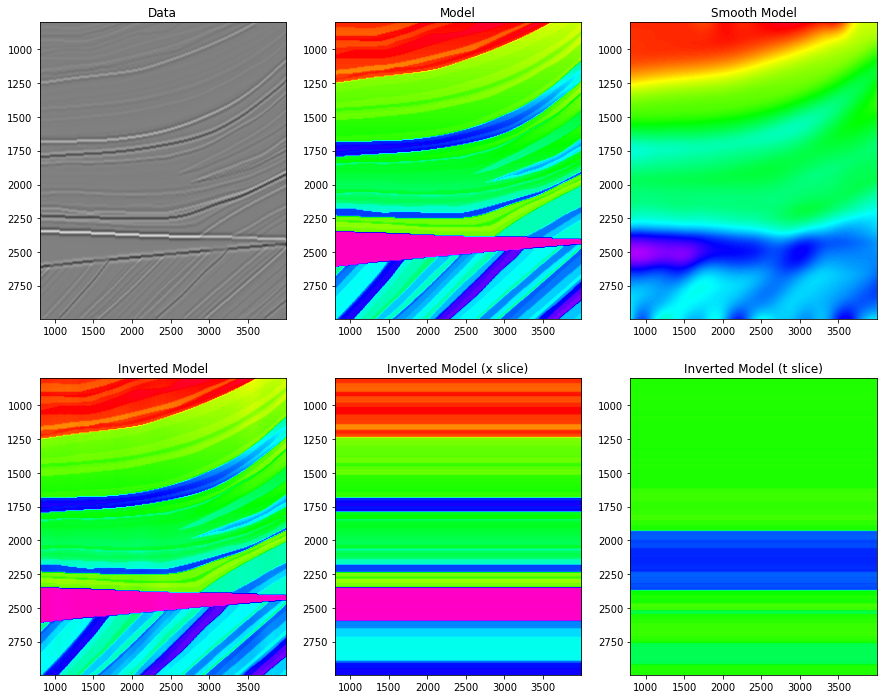

In [40]:
minv_dense_f, dr_dense_f = PoststackInversion(d_dense, wav_cp, m0=mback3d, explicit=True,
                                              simultaneous=False, **dict(rcond=1e-5))
print(minv_dense_f.dtype)

fig, axs = plt.subplots(2, 3, figsize=(15,12))
axs[0][0].imshow(cp.asnumpy(d_dense)[:, :, 5], cmap='gray', extent = (x[0], x[-1], z[-1], z[0]), vmin=-1, vmax=1)
axs[0][0].set_title('Data')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(m3d)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[0][1].set_title('Model')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(mback3d)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[0][2].set_title('Smooth Model')
axs[0][2].axis('tight')
axs[1][0].imshow(cp.asnumpy(minv_dense_f)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][0].set_title('Inverted Model')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(minv_dense_f)[:, 50], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][1].set_title('Inverted Model (x slice)')
axs[1][1].axis('tight')
axs[1][2].imshow(cp.asnumpy(minv_dense_f)[200], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][2].set_title('Inverted Model (t slice)')
axs[1][2].axis('tight');

In [41]:

def PoststackInversion(data, wav, m0=None, explicit=False,
                       simultaneous=False, epsI=None, epsR=None,
                       dottest=False, epsRL1=None, **kwargs_solver):
    r"""Post-stack linearized seismic inversion.

    Invert post-stack seismic operator to retrieve an elastic parameter of
    choice from band-limited seismic post-stack data.
    Depending on the choice of input parameters, inversion can be
    trace-by-trace with explicit operator or global with either
    explicit or linear operator.

    Parameters
    ----------
    data : :obj:`np.ndarray`
        Band-limited seismic post-stack data of size
        :math:`[n_{t0} (\times n_x \times n_y)]`
    wav : :obj:`np.ndarray`
        Wavelet in time domain (must have odd number of elements
        and centered to zero). If 1d, assume stationary wavelet for the entire
        time axis. If 2d of size :math:`[n_{t0} \times n_h]` use as
        non-stationary wavelet
    m0 : :obj:`np.ndarray`, optional
        Background model of size :math:`[n_{t0} (\times n_x \times n_y)]`
    explicit : :obj:`bool`, optional
        Create a chained linear operator (``False``, preferred for large data)
        or a ``MatrixMult`` linear operator with dense matrix
        (``True``, preferred for small data)
    simultaneous : :obj:`bool`, optional
        Simultaneously invert entire data (``True``) or invert
        trace-by-trace (``False``) when using ``explicit`` operator
        (note that the entire data is always inverted when working
        with linear operator)
    epsI : :obj:`float`, optional
        Damping factor for Tikhonov regularization term
    epsR : :obj:`float`, optional
        Damping factor for additional Laplacian regularization term
    dottest : :obj:`bool`, optional
        Apply dot-test
    epsRL1 : :obj:`float`, optional
        Damping factor for additional blockiness regularization term
    **kwargs_solver
        Arbitrary keyword arguments for :py:func:`scipy.linalg.lstsq`
        solver (if ``explicit=True`` and  ``epsR=None``)
        or :py:func:`scipy.sparse.linalg.lsqr` solver (if ``explicit=False``
        and/or ``epsR`` is not ``None``)

    Returns
    -------
    minv : :obj:`np.ndarray`
        Inverted model of size :math:`[n_{t0} (\times n_x \times n_y)]`
    datar : :obj:`np.ndarray`
        Residual data (i.e., data - background data) of
        size :math:`[n_{t0} (\times n_x \times n_y)]`

    Notes
    -----
    The cost function and solver used in the seismic post-stack inversion
    module depends on the choice of ``explicit``, ``simultaneous``, ``epsI``,
    and ``epsR`` parameters:

    * ``explicit=True``, ``epsI=None`` and ``epsR=None``: the explicit
      solver :py:func:`scipy.linalg.lstsq` is used if ``simultaneous=False``
      (or the iterative solver :py:func:`scipy.sparse.linalg.lsqr` is used
      if ``simultaneous=True``)
    * ``explicit=True`` with ``epsI`` and ``epsR=None``: the regularized
      normal equations :math:`\mathbf{W}^T\mathbf{d} = (\mathbf{W}^T
      \mathbf{W} + \epsilon_I^2 \mathbf{I}) \mathbf{AI}` are instead fed
      into the :py:func:`scipy.linalg.lstsq` solver if ``simultaneous=False``
      (or the iterative solver :py:func:`scipy.sparse.linalg.lsqr`
      if ``simultaneous=True``)
    * ``explicit=False`` and ``epsR=None``: the iterative solver
      :py:func:`scipy.sparse.linalg.lsqr` is used
    * ``explicit=False`` with ``epsR`` and ``epsRL1=None``: the iterative
      solver :py:func:`pylops.optimization.leastsquares.RegularizedInversion`
      is used to solve the spatially regularized problem.
    * ``explicit=False`` with ``epsR`` and ``epsRL1``: the iterative
      solver :py:func:`pylops.optimization.sparsity.SplitBregman`
      is used to solve the blockiness-promoting (in vertical direction)
      and spatially regularized (in additional horizontal directions) problem.

    Note that the convergence of iterative solvers such as
    :py:func:`scipy.sparse.linalg.lsqr` can be very slow for this type of
    operator. It is suggested to take a two steps approach with first a
    trace-by-trace inversion using the explicit operator, followed by a
    regularized global inversion using the outcome of the previous
    inversion as initial guess.
    """
    ncp = get_array_module(wav)

    # check if background model and data have same shape
    if m0 is not None and data.shape != m0.shape:
        raise ValueError('data and m0 must have same shape')

    # find out dimensions
    if data.ndim == 1:
        dims = 1
        nt0 = data.size
        nspat = None
        nspatprod = nx = 1
    elif data.ndim == 2:
        dims = 2
        nt0, nx = data.shape
        nspat = (nx,)
        nspatprod = nx
    else:
        dims = 3
        nt0, nx, ny = data.shape
        nspat = (nx, ny)
        nspatprod = nx * ny
        data = data.reshape(nt0, nspatprod)

    # create operator
    PPop = PoststackLinearModelling(wav, nt0=nt0,
                                    spatdims=nspat, explicit=explicit)
    if dottest:
        Dottest(PPop, nt0 * nspatprod, nt0 * nspatprod, raiseerror=True,
                backend=get_module_name(ncp), verb=True)
    print(PPop)
    # create and remove background data from original data
    datar = data.flatten() if m0 is None else \
        data.flatten() - PPop * m0.flatten()
    # invert model
    if epsR is None:
        # inversion without spatial regularization
        if explicit:
            if epsI is None and not simultaneous:
                # solve unregularized equations indipendently trace-by-trace
                minv = \
                get_lstsq(data)(PPop.A, datar.reshape(nt0, nspatprod).squeeze(),
                                **kwargs_solver)[0]
            elif epsI is None and simultaneous:
                # solve unregularized equations simultaneously
                if ncp == np:
                    minv = lsqr(PPop, datar, **kwargs_solver)[0]
                else:
                    minv = \
                        cgls(PPop, datar,
                             x0=ncp.zeros(int(PPop.shape[1]), PPop.dtype),
                             **kwargs_solver)[0]
            elif epsI is not None:
                # create regularized normal equations
                PP = ncp.dot(PPop.A.T, PPop.A) + epsI * ncp.eye(nt0, dtype=PPop.A.dtype)
                datarn = ncp.dot(PPop.A.T, datar.reshape(nt0, nspatprod))
                if not simultaneous:
                    # solve regularized normal eqs. trace-by-trace
                    minv = get_lstsq(data)(PP, datarn,
                                           **kwargs_solver)[0]
                else:
                    # solve regularized normal equations simultaneously
                    PPop_reg = MatrixMult(PP, dims=nspatprod)
                    if ncp == np:
                        minv = lsqr(PPop_reg, datar.ravel(),
                                    **kwargs_solver)[0]
                    else:
                        minv = cgls(PPop_reg, datar.ravel(),
                                    x0=ncp.zeros(int(PPop_reg.shape[1]),
                                                 PPop_reg.dtype),
                                    **kwargs_solver)[0]
            else:
                # create regularized normal eqs. and solve them simultaneously
                PP = ncp.dot(PPop.A.T, PPop.A) + epsI * ncp.eye(nt0, dtype=PPop.A.dtype)
                datarn = PPop.A.T * datar.reshape(nt0, nspatprod)
                PPop_reg = MatrixMult(PP, dims=nspatprod)
                minv = \
                    get_lstsq(data)(PPop_reg.A, datarn.flatten(),
                                    **kwargs_solver)[0]
        else:
            # solve unregularized normal equations simultaneously with lop
            if ncp == np:
                minv = lsqr(PPop, datar, **kwargs_solver)[0]
            else:
                minv = \
                    cgls(PPop, datar,
                         x0=ncp.zeros(int(PPop.shape[1]), PPop.dtype),
                         **kwargs_solver)[0]
    else:
        if epsRL1 is None:
            # L2 inversion with spatial regularization
            if dims == 1:
                Regop = SecondDerivative(nt0, dtype=PPop.dtype)
            elif dims == 2:
                Regop = Laplacian((nt0, nx), dtype=PPop.dtype)
            else:
                Regop = Laplacian((nt0, nx, ny), dirs=(1, 2), dtype=PPop.dtype)

            minv = RegularizedInversion(PPop, [Regop], data.flatten(),
                                        x0=None if m0 is None else m0.flatten(),
                                        epsRs=[epsR], returninfo=False,
                                        **kwargs_solver)
        else:
            # Blockiness-promoting inversion with spatial regularization
            if dims == 1:
                RegL1op = FirstDerivative(nt0, dtype=PPop.dtype)
                RegL2op = None
            elif dims == 2:
                RegL1op = FirstDerivative(nt0 * nx, dims=(nt0, nx),
                                          dir=0, dtype=PPop.dtype)
                RegL2op = SecondDerivative(nt0 * nx, dims=(nt0, nx),
                                           dir=1, dtype=PPop.dtype)
            else:
                RegL1op = FirstDerivative(nt0 * nx * ny, dims=(nt0, nx, ny),
                                          dir=0, dtype=PPop.dtype)
                RegL2op = Laplacian((nt0, nx, ny), dirs=(1, 2),
                                    dtype=PPop.dtype)

            if 'mu' in kwargs_solver.keys():
                mu = kwargs_solver['mu']
                kwargs_solver.pop('mu')
            else:
                mu = 1.
            if 'niter_outer' in kwargs_solver.keys():
                niter_outer = kwargs_solver['niter_outer']
                kwargs_solver.pop('niter_outer')
            else:
                niter_outer = 3
            if 'niter_inner' in kwargs_solver.keys():
                niter_inner = kwargs_solver['niter_inner']
                kwargs_solver.pop('niter_inner')
            else:
                niter_inner = 5
            if not isinstance(epsRL1, (list, tuple)):
                epsRL1 = list([epsRL1])
            if not isinstance(epsR, (list, tuple)):
                epsR = list([epsR])
            minv = SplitBregman(PPop, [RegL1op], data.ravel(),
                                RegsL2=[RegL2op], epsRL1s=epsRL1,
                                epsRL2s=epsR, mu=mu,
                                niter_outer=niter_outer,
                                niter_inner=niter_inner,
                                x0=None if m0 is None else m0.flatten(),
                                **kwargs_solver)[0]

    # compute residual
    if epsR is None:
        datar -= PPop * minv.ravel()
    else:
        datar = data.ravel() - PPop * minv.ravel()

    # reshape inverted model and residual data
    if dims == 1:
        minv = minv.squeeze()
        datar = datar.squeeze()
    elif dims == 2:
        minv = minv.reshape(nt0, nx)
        datar = datar.reshape(nt0, nx)
    else:
        minv = minv.reshape(nt0, nx, ny)
        datar = datar.reshape(nt0, nx, ny)

    if m0 is not None and epsR is None:
        minv = minv + m0

    return minv, datar


In [42]:
minv_dense_f, dr_dense_f = PoststackInversion(dn_dense, wav_cp, m0=mback3d, explicit=True, epsI=1e-3, 
                                              simultaneous=False, **dict(rcond=1e-5))

dn_dense.dtype, wav_cp.dtype, mback3d.dtype, minv_dense_f.dtype

<13200000x13200000 MatrixMult with dtype=float32>


(dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'))

<13200000x13200000 MatrixMult with dtype=float32>
<13200000x13200000 MatrixMult with dtype=float32>
<13200000x13200000 LinearOperator with dtype=float32>
float32 float32 float32


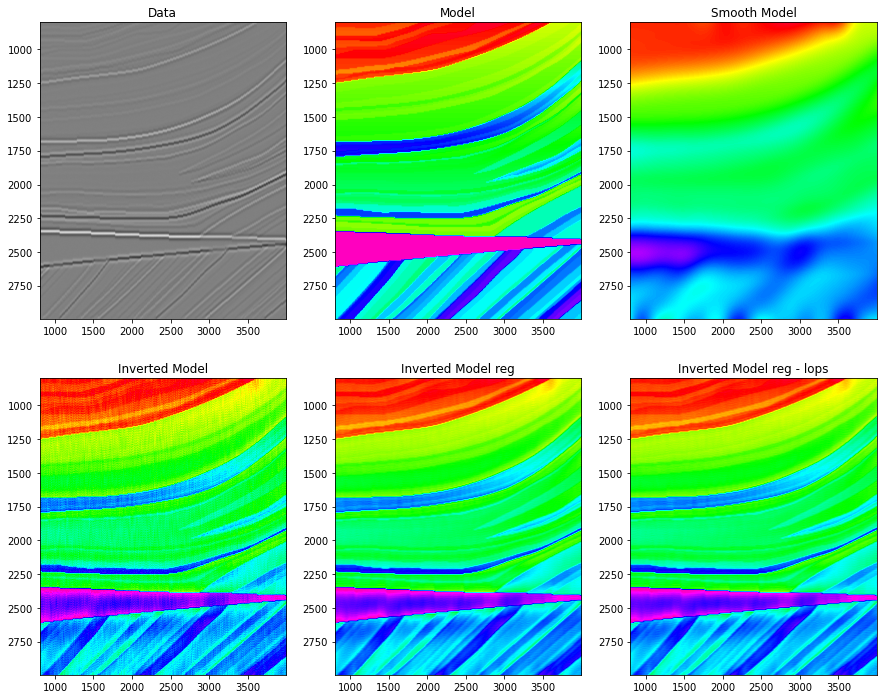

In [43]:
minv_dense_f, dr_dense_f = PoststackInversion(dn_dense, wav_cp, m0=mback3d, explicit=True, epsI=1e-3, 
                                              simultaneous=False, **dict(rcond=1e-5))

minv_dense_reg_f, dr_dense_reg_f = PoststackInversion(dn_dense, wav_cp, m0=minv_dense_f, explicit=True, 
                                                      epsR=np.sqrt(1e2), 
                                                      **dict(damp=np.sqrt(1e-2), niter=50))
minv_lop_reg_f, dr_lop_reg_f = PoststackInversion(dn, wav_cp, m0=minv_dense_f, explicit=False, 
                                                  epsR=np.sqrt(1e2), 
                                                  **dict(damp=np.sqrt(1e-2), niter=50))

print(minv_dense_f.dtype, minv_dense_reg_f.dtype, minv_lop_reg_f.dtype)


fig, axs = plt.subplots(2, 3, figsize=(15,12))
axs[0][0].imshow(cp.asnumpy(dn)[:, :, 5], cmap='gray', extent = (x[0], x[-1], z[-1], z[0]), vmin=-1, vmax=1)
axs[0][0].set_title('Data')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(m3d)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[0][1].set_title('Model')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(mback3d)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[0][2].set_title('Smooth Model')
axs[0][2].axis('tight')
axs[1][0].imshow(cp.asnumpy(minv_dense_f)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][0].set_title('Inverted Model')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(minv_dense_reg_f)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][1].set_title('Inverted Model reg')
axs[1][1].axis('tight');
axs[1][2].imshow(cp.asnumpy(minv_lop_reg_f)[:, :, 5], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                 vmin=m.min(), vmax=m.max())
axs[1][2].set_title('Inverted Model reg - lops')
axs[1][2].axis('tight');

In [44]:
%timeit -n1 -r2 PoststackInversion(dn, wav_cp, m0=minv_dense_f, explicit=False,  epsR=np.sqrt(1e2), **dict(damp=np.sqrt(1e-2), niter=5))

<13200000x13200000 LinearOperator with dtype=float32>
<13200000x13200000 LinearOperator with dtype=float32>
1 loop, best of 2: 936 ms per loop


In [45]:
dn_np, minv_dense_np = cp.asnumpy(dn), cp.asnumpy(minv_dense_f)
%timeit -n1 -r2 PoststackInversion(dn_np, wav, m0=minv_dense_np, explicit=False,  epsR=np.sqrt(1e2), **dict(damp=np.sqrt(1e-2), iter_lim=5))

<13200000x13200000 LinearOperator with dtype=float64>
<13200000x13200000 LinearOperator with dtype=float64>
1 loop, best of 2: 19.4 s per loop


## 2D Prestack inversion

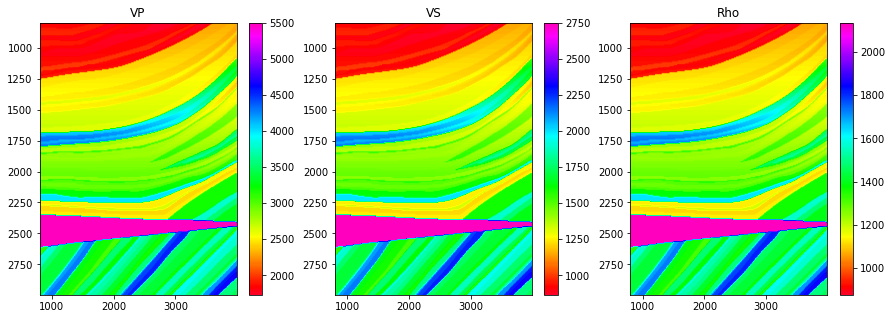

In [46]:
model = np.load(inputfile)
x, z, m = model['x'][::3], model['z'], 1000*model['model'][:, ::3]
nx, nz = len(x), len(z)

mvp = m.copy()
mvs = m/2
mrho = m/3+300

fig, axs = plt.subplots(1, 3, figsize=(15,5))
im=axs[0].imshow(mvp, cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
              vmin=mvp.min(), vmax=mvp.max())
axs[0].set_title('VP')
axs[0].axis('tight')
plt.colorbar(im, ax=axs[0])
im=axs[1].imshow(mvs, cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
              vmin=mvs.min(), vmax=mvs.max())
axs[1].set_title('VS')
plt.colorbar(im, ax=axs[1])
axs[1].axis('tight')
im=axs[2].imshow(mrho, cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]),
              vmin=mrho.min(), vmax=mrho.max())
axs[2].set_title('Rho')
axs[2].axis('tight');
plt.colorbar(im, ax=axs[2]);

In [47]:
m = np.log(np.stack((mvp, mvs, mrho),axis=1))
m = cp.asarray(m).astype(np.float32)

theta = cp.linspace(thetamin, thetamax, ntheta).astype(np.float32)

# lop (constant vsvp)
PPop = PrestackLinearModelling(wav_cp.astype(np.float32), theta, vsvp=vsvp, nt0=nz, 
                               spatdims=(nx,), linearization='akirich')
dottest(PPop, nz*ntheta*nx, nz*3*nx, verb=True, backend='cupy')

# dense (constant vsvp)
PPop_dense = PrestackLinearModelling(wav_cp.astype(np.float32), theta, vsvp=vsvp, nt0=nz, 
                                     spatdims=(nx,), linearization='akirich', explicit=True)
dottest(PPop_dense, nz*ntheta*nx, nz*3*nx, verb=True, backend='cupy')

# lop
dPP = PPop * m.flatten()
dPP = dPP.reshape(nz,ntheta,nx)

# dense
dPP_dense = PPop_dense*m.swapaxes(0,1).flatten()
dPP_dense = dPP_dense.reshape(ntheta,nz,nx).swapaxes(0,1)
dPPn_dense = dPP_dense + cp.random.normal(0, 5e-2, dPP_dense.shape).astype(np.float32)

print(dPP.dtype, dPP_dense.dtype)

Dot test passed, v^T(Opu)=150.082294 - u^T(Op^Tv)=150.082376
Dot test passed, v^T(Opu)=-2427.136690 - u^T(Op^Tv)=-2427.136690
float32 float32


In [48]:
madj_dense = PPop_dense.H*(dPP_dense.swapaxes(0,1).flatten())
madj = PPop.H*dPP.flatten()

madj_dense = madj_dense.reshape(3,nz,nx).swapaxes(0,1)
madj = madj.reshape(nz,3,nx)

print((dPP-dPP_dense).max())
print((madj-madj_dense).max())

1.4193356e-06
1.7166138e-05


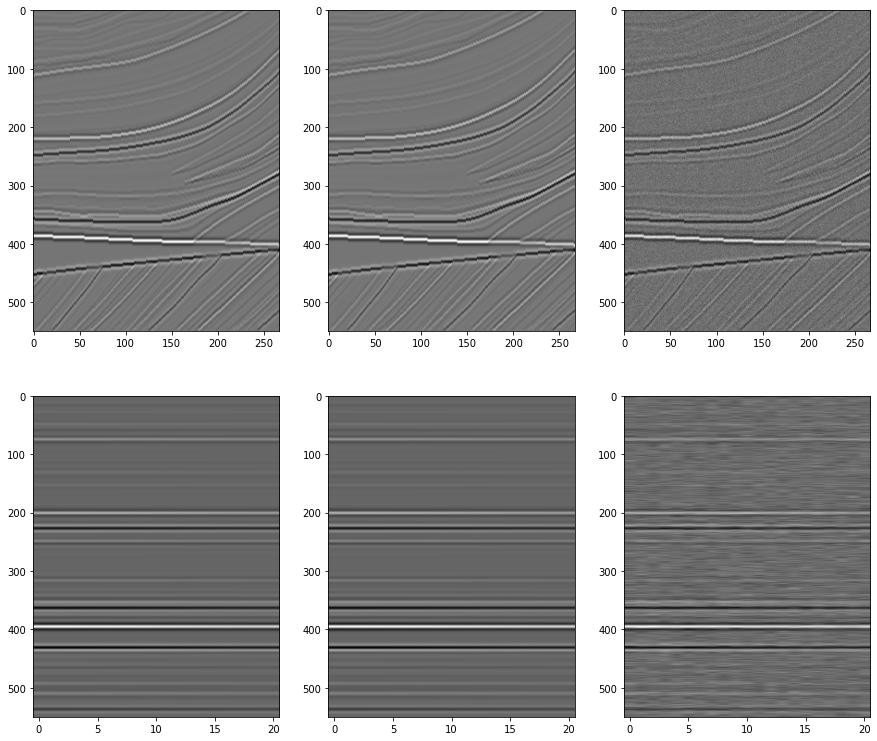

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(15,13))
axs[0][0].imshow(cp.asnumpy(dPP)[:,0,:], cmap='gray')
axs[0][0].axis('tight')
axs[0][1].imshow(cp.asnumpy(dPP_dense)[:,0,:], cmap='gray')
axs[0][1].axis('tight')
axs[0][2].imshow(cp.asnumpy(dPPn_dense)[:,0,:], cmap='gray')
axs[0][2].axis('tight')
axs[1][0].imshow(cp.asnumpy(dPP)[:,:,nx//2], cmap='gray')
axs[1][0].axis('tight')
axs[1][1].imshow(cp.asnumpy(dPP_dense)[:,:,nx//2], cmap='gray')
axs[1][1].axis('tight')
axs[1][2].imshow(cp.asnumpy(dPPn_dense)[:,:,nx//2], cmap='gray')
axs[1][2].axis('tight');

In [50]:
def plotinversion(m, mback, minv, params = ['VP', 'VS', 'Rho'], title=None):
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    fig.suptitle(title, y=0.99)
    for ip, param in enumerate(params):
        im=axs[0][ip].imshow(m[:,ip], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                  vmin=m[:,ip].min(), vmax=m[:,ip].max())
        axs[0][ip].set_title(param+' - true')
        axs[0][ip].axis('tight')
        plt.colorbar(im, ax=axs[0][ip])

        im=axs[1][ip].imshow(mback[:,ip], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                             vmin=m[:,ip].min(), vmax=m[:,ip].max())
        axs[1][ip].set_title(param+' - back')
        axs[1][ip].axis('tight')
        plt.colorbar(im, ax=axs[1][ip])
        im=axs[2][ip].imshow(minv[:,ip], cmap='gist_rainbow', extent = (x[0], x[-1], z[-1], z[0]), 
                             vmin=m[:,ip].min(), vmax=m[:,ip].max())
        axs[2][ip].set_title(param+' - inv')
        axs[2][ip].axis('tight')
        plt.colorbar(im, ax=axs[2][ip])

float32


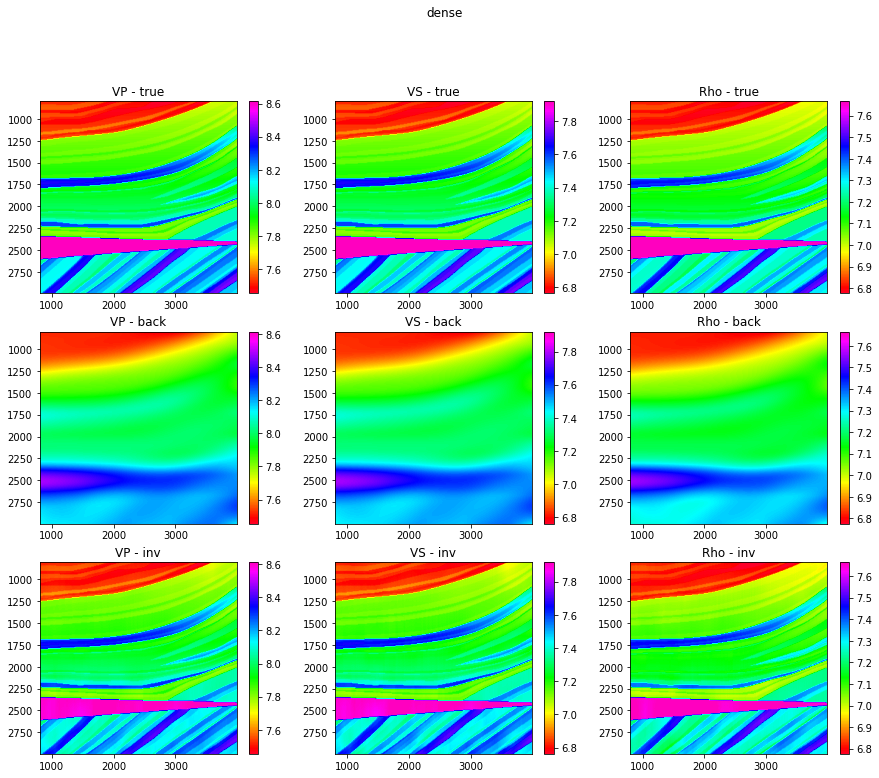

In [51]:
mback = filtfilt(np.ones(nsmooth)/float(nsmooth), 1, cp.asnumpy(m), axis=0)
mback = filtfilt(np.ones(nsmooth)/float(nsmooth), 1, mback, axis=2)

minv_dense, dPP_dense_res = \
    PrestackInversion(dPP_dense, cp.asarray(theta), wav_cp, m0=cp.asarray(mback).astype(dtype), linearization='akirich',
                      explicit=True, simultaneous=False, dottest=False, 
                      returnres=True, **dict(rcond=1e-5))
print(minv_dense.dtype)

plotinversion(cp.asnumpy(m), mback, cp.asnumpy(minv_dense), params = ['VP', 'VS', 'Rho'], title='dense')

In [52]:
%timeit -n1 -r3 PrestackInversion(dPP_dense, cp.asarray(theta), wav_cp, m0=cp.asarray(mback).astype(dtype), linearization='akirich', explicit=True, simultaneous=False)

1 loop, best of 3: 1.28 s per loop


In [53]:
dPP_dense_np, mback_np = cp.asnumpy(dPP_dense), cp.asnumpy(mback) 
theta_np, wav_np = cp.asnumpy(theta), cp.asnumpy(wav)
%timeit -n1 -r3 PrestackInversion(dPP_dense_np, theta_np, wav_np, m0=mback_np, linearization='akirich', explicit=True, simultaneous=False)

1 loop, best of 3: 19.2 s per loop


In [54]:
%timeit -n1 -r3 PrestackInversion(dPP_dense, cp.asarray(theta), wav_cp, m0=cp.asarray(mback).astype(dtype), linearization='akirich', explicit=False, simultaneous=False, **dict(niter=4))

1 loop, best of 3: 70 ms per loop


In [55]:
dPP_dense_np, mback_np = cp.asnumpy(dPP_dense), cp.asnumpy(mback)
theta_np, wav_np = cp.asnumpy(theta), cp.asnumpy(wav)
%timeit -n1 -r3 PrestackInversion(dPP_dense_np, theta_np, wav_np, m0=mback_np, linearization='akirich', explicit=False, simultaneous=False, **dict(iter_lim=4))

1 loop, best of 3: 1.82 s per loop
